# The Spark Foundation Internship - TASK 3
#### Author: Muhammad Hammad Hassan
#### Batch October 2021
------------------
**Objectives:**
1. Identify the problems in this retail store dataset
2. Find the weaknesses in our retail store dataset to identify how to improve sales and profits

In [1]:
# Importing Libraries

# for data structures
import pandas as pd
import numpy as np

# for visualizations
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

# for warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# preparing dataframe
Sample = pd.read_csv('SampleSuperstore.csv')

In [3]:
# looking at forst 5 rows
Sample.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
# How is our dataset structured?
Sample.shape

(9994, 13)

**COMMENT:** *Hmm... looks like we have 9994 entries and 13 fields in total. In easy language, it is actually a huge dataset.*

In [5]:
# current "numerical" summary of the dataset
Sample[['Sales','Quantity','Discount','Profit']].describe()

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


In [6]:
#checking for null values

#Alternate method
# Sample.isnull().sum()

Sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


**COMMENT:** *We have no inconsistency in the dataset so far*

------------------
## Checking for Duplicates and Removing them

In [7]:
#checking for duplicate values
Sample.duplicated().sum()

17

**COMMENT:** *We have found 17 (complete)rows, which are duplicated*

In [8]:
# Dropping duplicate data, but keep their first instances
Sample.drop_duplicates( subset=None, keep='first',inplace=True)
Sample.duplicated().sum()

0

**COMMENT:** *Results after dropping duplicates*

In [9]:
# How many unique values each column have?
Sample.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**COMMENT:** *Above output shows how many unique values each column contains. In case of Categorical Data, it is the number of how many categories are there in a single column*

-------------------------

## Checking for Correlation using Heat Map

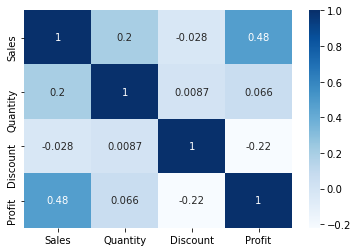

In [10]:
# Converting "Postal Code" to string datatype
Sample['Postal Code'] = Sample['Postal Code'].astype(str)

#correlation matrix: Checking for correlation between fields
corr = Sample.corr()
sb.heatmap(corr,annot=True, cmap='Blues')
plt.show()

**COMMENT:** *If we observe the correlation between numerical values the dataset has, we can see that neither "Discounts" nor "Quantity" has a strong relation with "sales".*

If we **encoded** each categorical data and checked its **Correlation** with "Sales", we would find the output didn't show any satisfactory results. We didn't actually **encode** the categorical values here in this notebook, since it didn't yeild results and would be a wastage of space.

------------------------------

## Analysis of *"Shipping Modes"*

In [11]:
for mode in Sample['Ship Mode'].unique():
    print("-> ",mode)

->  Second Class
->  Standard Class
->  First Class
->  Same Day


Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

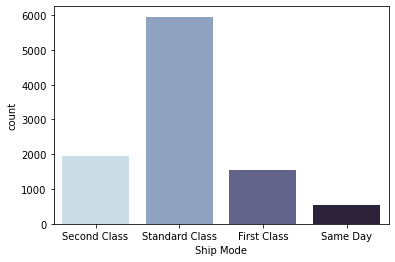

In [12]:
sb.countplot(x=Sample['Ship Mode'], palette="ch:s=.25,rot=-.25")
Sample['Ship Mode'].value_counts()

**COMMENT:** *Looks like shipping through Standard Class is in high demand.*

Text(0, 0.5, 'Profits & Sales')

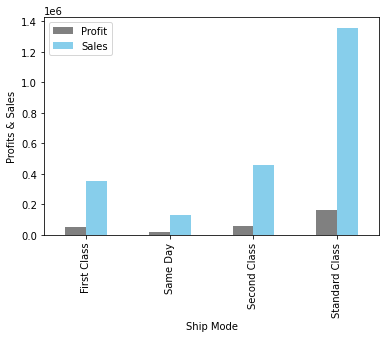

In [13]:
Sample.groupby('Ship Mode')[['Profit','Sales']].sum().plot.bar(color=['Gray','skyblue'])
plt.ylabel('Profits & Sales')

**COMMENT:** *Higest Profit is gained through Standard Class As well. It is also high in demand, so that makes sense.*

--------------------------
## Analysis of *"Segments"*

In [14]:
for seg in Sample['Segment'].unique():
    print("-> ",seg)

->  Consumer
->  Corporate
->  Home Office


Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

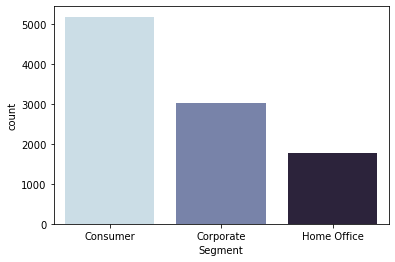

In [15]:
sb.countplot(x=Sample['Segment'], palette="ch:s=.25,rot=-.25")
Sample['Segment'].value_counts()

**COMMENT:** *Consumers seem to have a large part of the market*

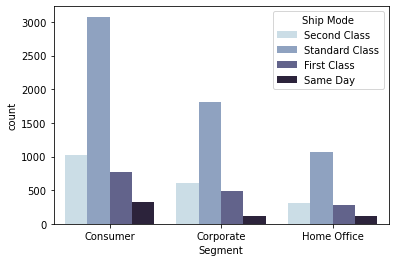

In [16]:
sb.countplot(x='Segment', hue='Ship Mode', data=Sample, palette="ch:s=.25,rot=-.25")
plt.show()

**COMMENT:** *Consumers have a high Sales Record in each segment. Also Standard Class seems to be the most preferred mode of shipping.*

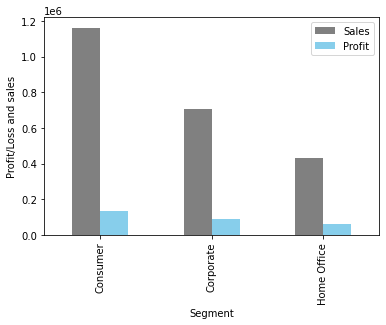

In [17]:
Sample.groupby('Segment')[['Sales','Profit']].sum().plot.bar(color=['gray','SkyBlue'])
plt.ylabel('Profit/Loss and sales')
plt.show()

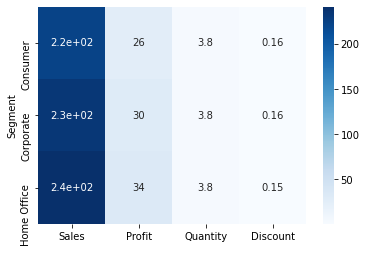

In [18]:
#average sales from ewvery segment
Seg = Sample.groupby('Segment')[['Sales','Profit','Quantity','Discount']].mean()
sb.heatmap(Seg,annot=True, cmap='Blues')
plt.show()

**COMMENT:** *Home Office Appliances have a slightly Higher Sales and Profits. Whereas, Quantity tends to remain same*

--------------------------
## Analysis of *"Region"*

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

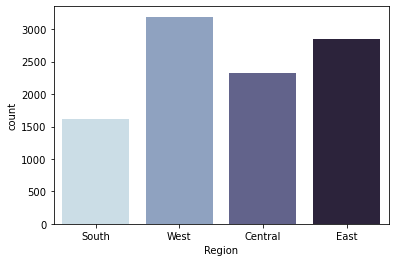

In [19]:
sb.countplot(x='Region',data=Sample,palette="ch:s=.25,rot=-.25")
Sample['Region'].value_counts()

**COMMENT:** *Most sales are comming from the West Region*

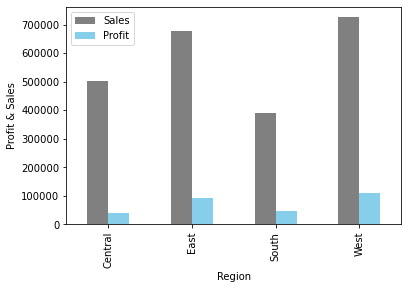

In [20]:
Sample.groupby('Region')[['Sales','Profit']].sum().plot.bar(color=['gray','SkyBlue'])
plt.ylabel('Profit & Sales')
plt.show()

**COMMENT:** *East & West regions are almost similar with a little difference*

--------------------------
## Analysis of *"Categories"* & *"Sub-Categories"*

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

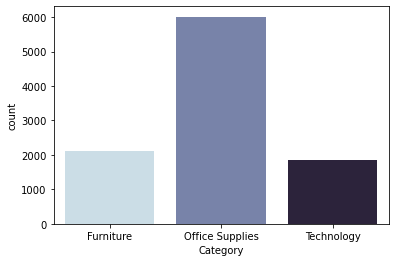

In [21]:
sb.countplot(x='Category',data=Sample,palette="ch:s=.25,rot=-.25")
Sample['Category'].value_counts()

**COMMENT:** *Office Supplies have a high occurence in our dataset, this could mean that it is in high demand*

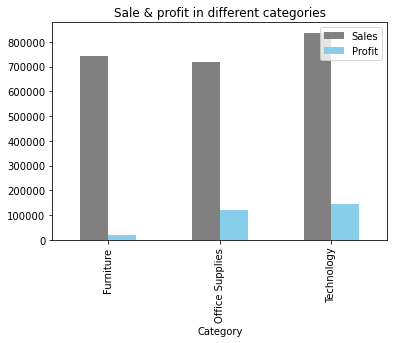

In [22]:
Sample.groupby('Category')[['Sales','Profit']].sum().plot.bar(color=['gray','SkyBlue'])
plt.title('Sale & profit in different categories')
plt.legend(loc=1)
plt.show()

**COMMENT:** *Technology seem to have a high demand. On the other hand, Office Supplies and Furniture have approximately the same standing*

In [56]:
# looking for Furniture popularity among regions
Furn_Reg = Sample[Sample['Category']=='Furniture']
Furn_Reg['Region'].value_counts()

West       706
East       600
Central    480
South      332
Name: Region, dtype: int64

In [57]:
# looking for Office Supplies popularity among regions
Furn_Reg = Sample[Sample['Category']=='Office Supplies']
Furn_Reg['Region'].value_counts()

West       1888
East       1710
Central    1419
South       995
Name: Region, dtype: int64

In [58]:
# looking for Furniture popularity among regions
Furn_Reg = Sample[Sample['Category']=='Technology']
Furn_Reg['Region'].value_counts()

West       599
East       535
Central    420
South      293
Name: Region, dtype: int64

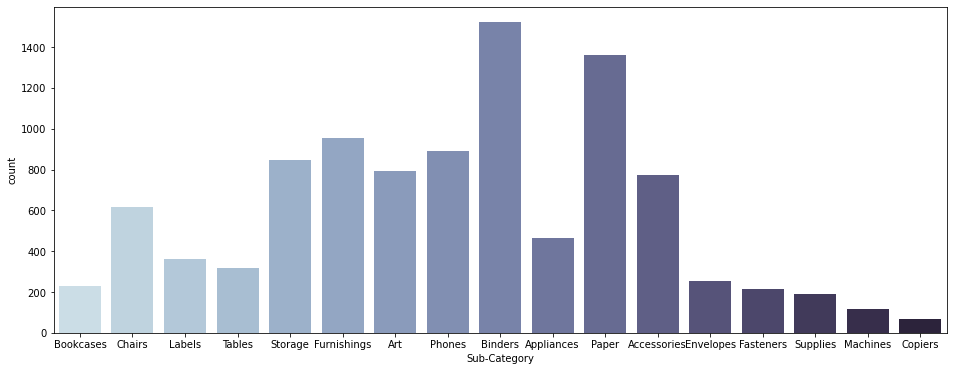

In [23]:
plt.figure(figsize=(16,6))
sb.countplot(x=Sample['Sub-Category'],palette="ch:s=.25,rot=-.25")
plt.show()

**COMMENT:** *Binders and papers seem to have high occurences in our sample dataset. They both might be related*

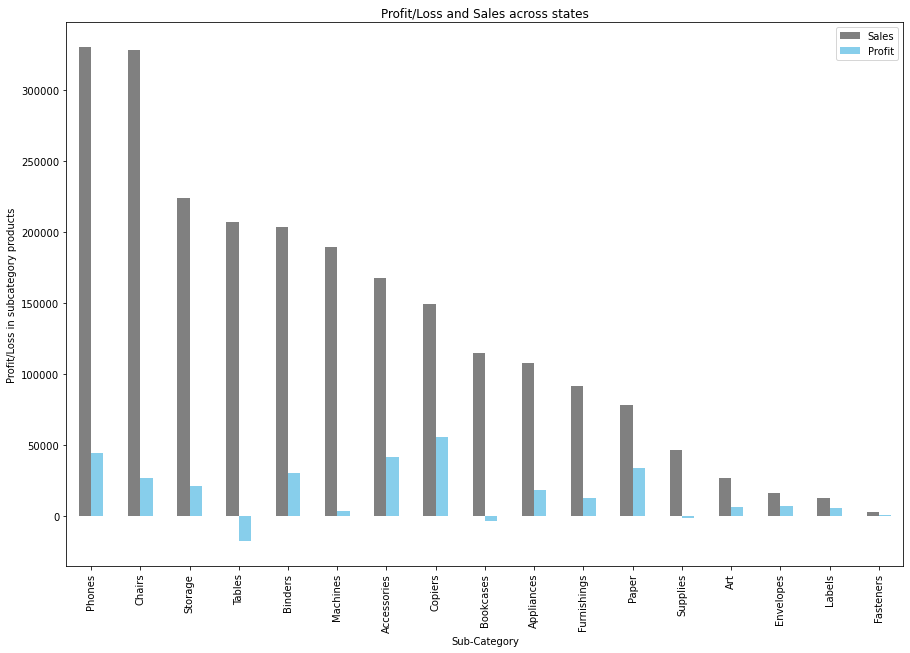

In [24]:
ps = Sample.groupby('Sub-Category')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(figsize=(15,10),color=['gray','SkyBlue'])
plt.title('Profit/Loss and Sales across states')
plt.xlabel('Sub-Category')
plt.ylabel('Profit/Loss in subcategory products')
plt.show()

**COMMENT:** *Copiers, Accessories,Phones,Papers and Binders seem to have a reasonable sale.*

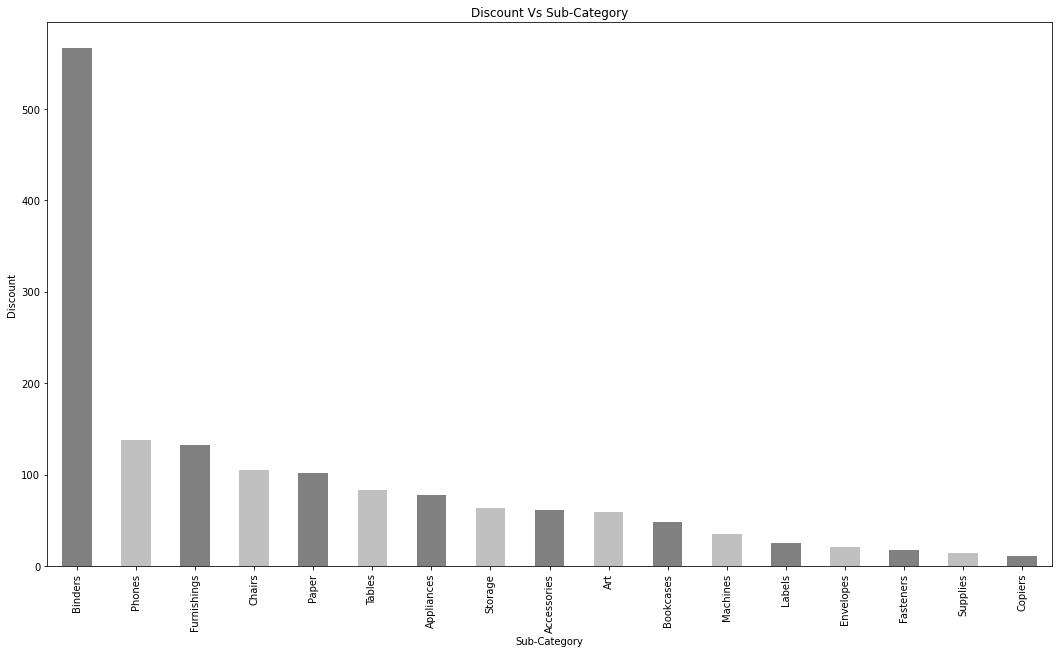

In [25]:
# Groupby Sub-Category & Discount
ps = Sample.groupby('Sub-Category')['Discount'].sum().sort_values(ascending=False)
ps[:].plot.bar(figsize=(18,10),color=['gray','Silver'])
plt.title('Discount Vs Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Discount')
plt.show()

**COMMENT:** *We gave a hige discount on binders while it was our one of the best source of income.*

-----------------
## Analysis of State-wise dealings

In [26]:
#Number of total unique states included in our dataset
print("total number of states: ",len(Sample['State'].unique()))

total number of states:  49


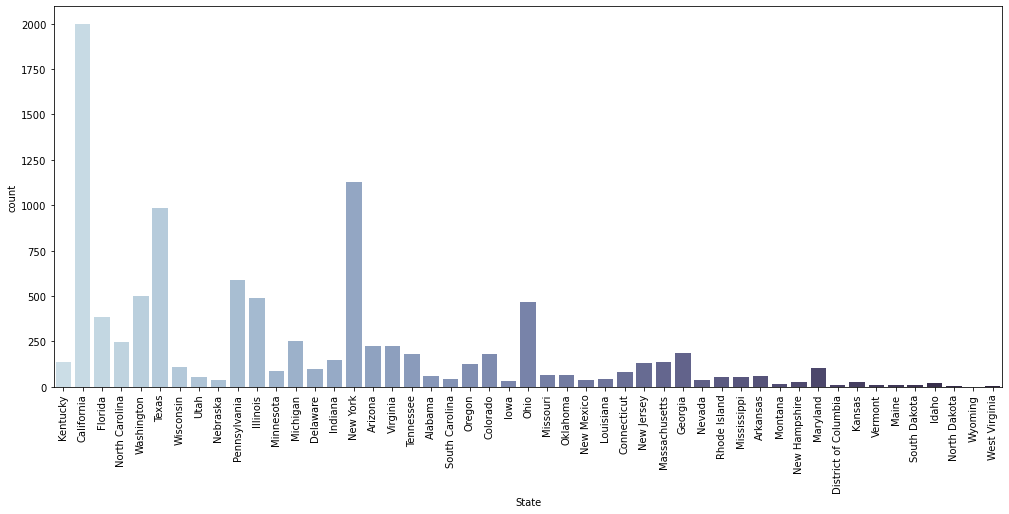

In [27]:
plt.figure(figsize=(17,7))
sb.countplot(x=Sample['State'],palette="ch:s=.25,rot=-.25")
plt.xticks(rotation=90)
plt.show()

**COMMENT:** *California has the higest occurence. Texas and New York comes second to it. While Wyoming, West Virginia, North Dakota,Idaho, South Dakota, Maine, Vermont, Kansas, District of Columbia, New Hampshire, Mopntana ... have the lowest*

MAX Profit is found to be:  204.08893636363638  $
MAX Loss/MIN Profit is found to be:  -36.237858547008585  $


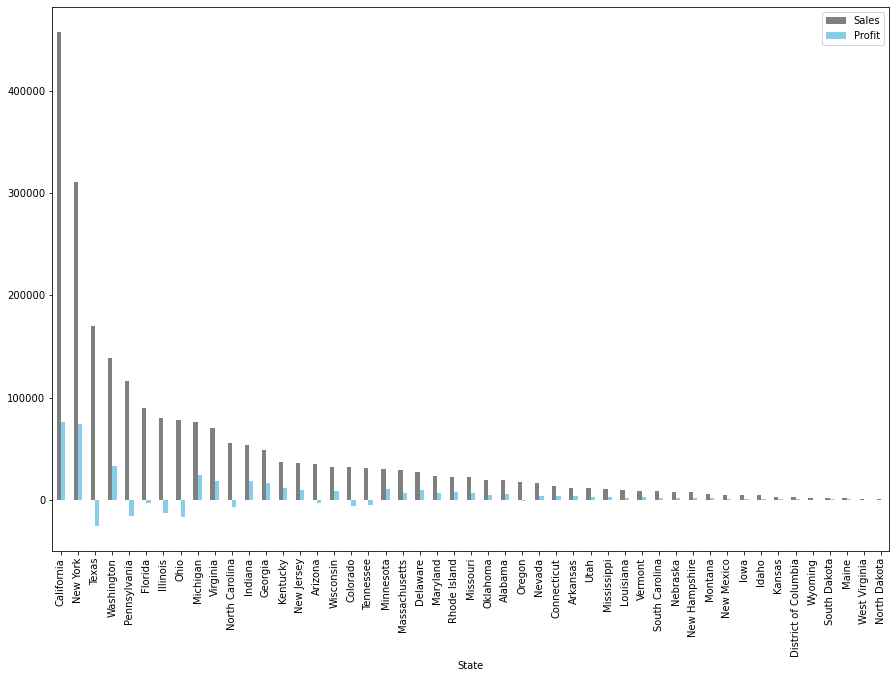

In [28]:
# Statewise profits
df = Sample.groupby(['State'])[['Profit']].mean()
print("MAX Profit is found to be: ",max(df['Profit'])," $")
print("MAX Loss/MIN Profit is found to be: ",min(df['Profit'])," $")
ps = Sample.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(figsize=(15,10),color=['Gray','SkyBlue'])
# plt.figure(figsize=(18,8))
# sb.barplot(x=Sample['State'],y=Sample['Profit'],palette="Blues")
plt.xticks(rotation=90)
plt.show()

**COMMENT:** *Highest Average Profit count belongs to California and New York, while the Higest loss count belongs to Texas(Quite similar to North Pennsylvinia)*

-----------------
## Analysis of Sales-Profit Ratio

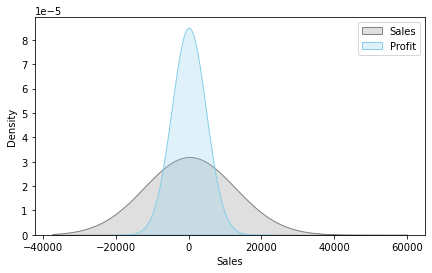

In [29]:
#KDE Plot
plt.figure(figsize=(7,4))
sb.kdeplot(Sample['Sales'], color='Gray', label='Sales', shade=True, bw_method=20)
sb.kdeplot(Sample['Profit'], color='Skyblue', label='Profit', shade=True, bw_method=20)
plt.legend()
plt.show()

**COMMENT:** **

-----------------
## Discount vs Profit Analysis

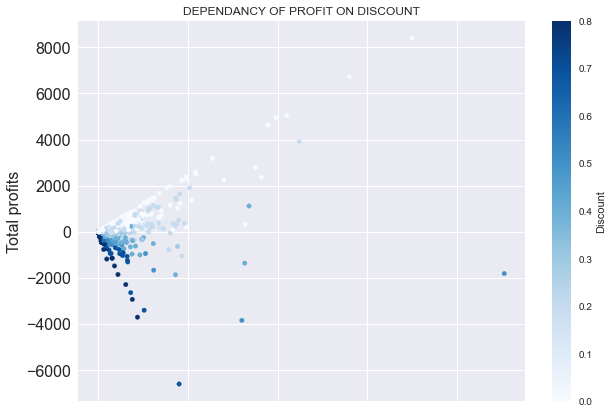

In [30]:
#DEPENDANCY OF PROFIT ON DISCOUNT
plt.style.use('seaborn')
Sample.plot(kind='scatter', figsize= (10,7), x='Sales', y='Profit', c='Discount', s= 20, fontsize= 16, colormap= 'Blues')
plt.ylabel('Total profits', fontsize= 16)
plt.title('DEPENDANCY OF PROFIT ON DISCOUNT')
plt.show()

**COMMENT:** *This shows a general scenario that as our discount increase, our profit decreases.*

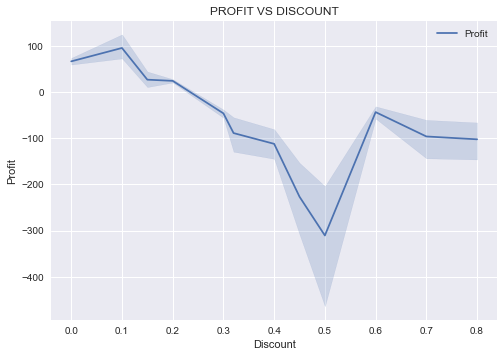

In [31]:
# Profit vs discount
sb.lineplot(x='Discount',y='Profit',label='Profit',data=Sample)
plt.title('PROFIT VS DISCOUNT')
plt.legend()
plt.show()

**COMMENT:** *Discounts from 0-50% decrease our profits and are not doing anything worthwhile. Whereas if the discount is more than 50%, we observe an increase in the profit. Perhaps additional samples of this dataset are required.*

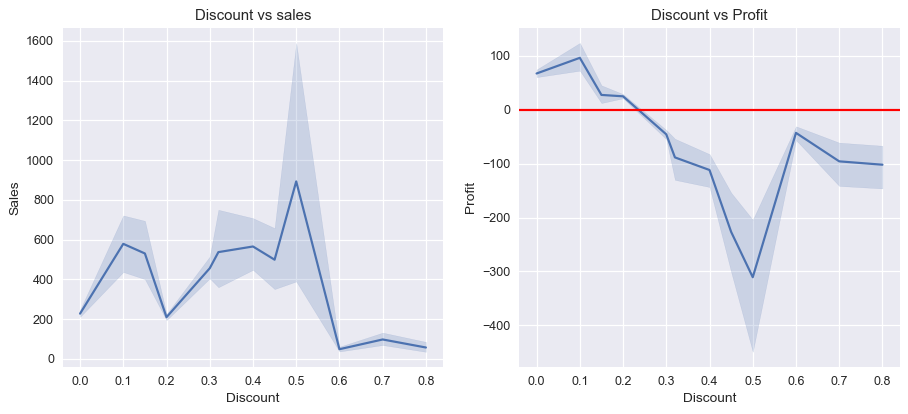

In [33]:
# Let's visualize effect of discount on sales and profit
plt.figure(figsize=(12,5),dpi=90)

plt.subplot(1,2,1)
sb.lineplot(data=Sample,x='Discount',y='Sales')
plt.title('Discount vs sales')

plt.subplot(1,2,2)
sb.lineplot(data=Sample,x='Discount',y='Profit')
plt.title('Discount vs Profit')
plt.axhline(y=0,color='red');

**COMMENT:** *This is a general scenario that tells us that as Discounts are increased our Sales Increase as well, but the profit we gain from that is not considerable. This scenario is applicable on for discounts from 0-50%.*

*From 50%-above discounts, our previous scenario is reversed, and we observe that Sales decrease and profit increase. Again this does not cover the loss we initially incurred.*

*Discounts of 60% look like they are popular but are have a bad average sales and profit. On the other hand, if we look at discounts ranging from 0-20% They have some good profits. Therefore 0-20% discounts should be our threshold.*

-----------------

## Discount Vs Profit/Sales W.R.T Consumer Segments

In [48]:
# collecting all data related to "Consumers"
con_prod = Sample[Sample['Segment']=='Consumer']
con_prod.head(-1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9986,Standard Class,Consumer,United States,Los Angeles,California,90008,West,Technology,Accessories,36.2400,1,0.00,15.2208
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


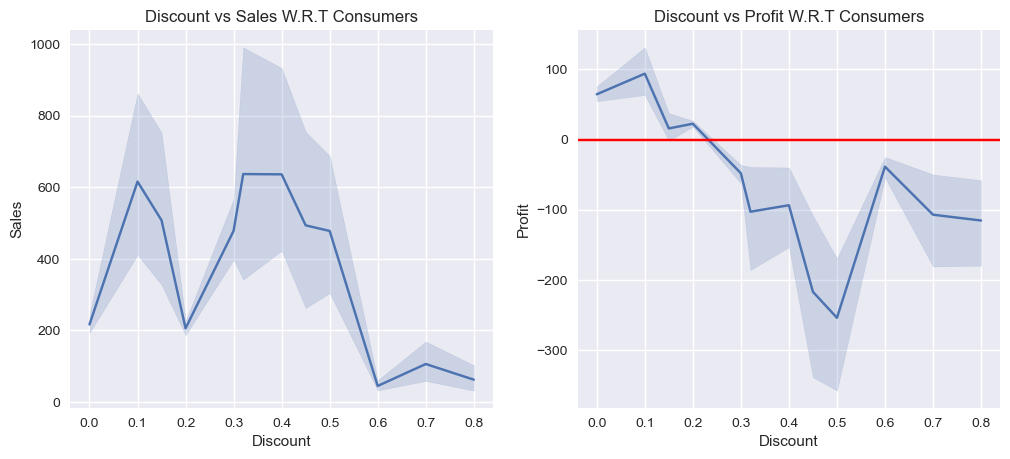

In [38]:
# Visualizing the effects of discount on slaes and proft
plt.figure(figsize=(12,5), dpi=100)

plt.subplot(1,2,1)
sb.lineplot(data=con_prod, x='Discount', y='Sales')
plt.title('Discount vs Sales W.R.T Consumers')

plt.subplot(1,2,2)
sb.lineplot(data=con_prod, x='Discount', y='Profit')
plt.title('Discount vs Profit W.R.T Consumers')
plt.axhline(y=0,color='red')

plt.show()

**COMMENT:** *Here, 0-10% discounts show a significant increase in Sales and Profits with manageable variance.*
    
*10-20% Discounts show steep fall in the profits, but is still manageable for the most part, as it does not drop below the "0" marker.*

*Other options cannot be considered as feasible.*

--------------------

## Discount Vs Profit/Sales W.R.T Corporate Segments

In [47]:
# collecting all data related to "Corporate"
cor_prod = Sample[Sample['Segment']=='Corporate']
cor_prod.head(-1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.0,6.8714
21,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Art,19.460,7,0.0,5.0596
22,Standard Class,Corporate,United States,Fremont,Nebraska,68025,Central,Office Supplies,Appliances,60.340,7,0.0,15.6884
35,First Class,Corporate,United States,Richardson,Texas,75080,Central,Technology,Phones,1097.544,7,0.2,123.4737
36,First Class,Corporate,United States,Richardson,Texas,75080,Central,Furniture,Furnishings,190.920,5,0.6,-147.9630
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9955,Second Class,Corporate,United States,Los Angeles,California,90045,West,Furniture,Tables,273.568,2,0.2,10.2588
9964,Second Class,Corporate,United States,Newark,Delaware,19711,East,Furniture,Furnishings,13.400,1,0.0,6.4320
9965,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Paper,4.980,1,0.0,2.3406
9966,Second Class,Corporate,United States,Newark,Delaware,19711,East,Office Supplies,Envelopes,109.690,7,0.0,51.5543


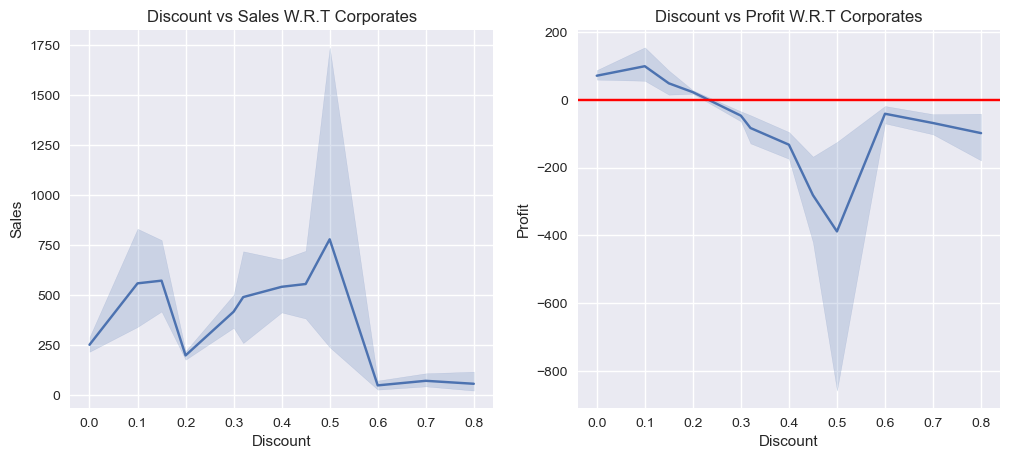

In [43]:
# Visualizing the effects of discount on slaes and proft
plt.figure(figsize=(12,5), dpi=100)

plt.subplot(1,2,1)
sb.lineplot(data=cor_prod, x='Discount', y='Sales')
plt.title('Discount vs Sales W.R.T Corporates')

plt.subplot(1,2,2)
sb.lineplot(data=cor_prod, x='Discount', y='Profit')
plt.title('Discount vs Profit W.R.T Corporates')
plt.axhline(y=0,color='red')

plt.show()

**COMMENT:** *Again we observe that only discounts which are ranging between 0-20% are bringing positive and reasonable profits.*

*15% Discounts seem to have good sales and reasonable profit overall(if we are to pursue practicality)*

---------------

## Discount Vs Profit/Sales W.R.T Home Office Segments

In [46]:
# collecting all data related to "Home Office"
hom_prod = Sample[Sample['Segment']=='Home Office']
hom_prod.head(-1)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
14,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,68.8100,5,0.80,-123.8580
15,Standard Class,Home Office,United States,Fort Worth,Texas,76106,Central,Office Supplies,Binders,2.5440,3,0.80,-3.8160
34,Second Class,Home Office,United States,Houston,Texas,77095,Central,Office Supplies,Paper,29.4720,3,0.20,9.9468
37,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Office Supplies,Envelopes,113.3280,9,0.20,35.4150
38,Standard Class,Home Office,United States,Houston,Texas,77041,Central,Furniture,Bookcases,532.3992,3,0.32,-46.9764
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9974,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Art,18.6900,7,0.00,5.2332
9975,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Paper,13.3600,2,0.00,6.4128
9976,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,249.5840,2,0.20,31.1980
9977,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Fasteners,13.8600,7,0.00,0.0000


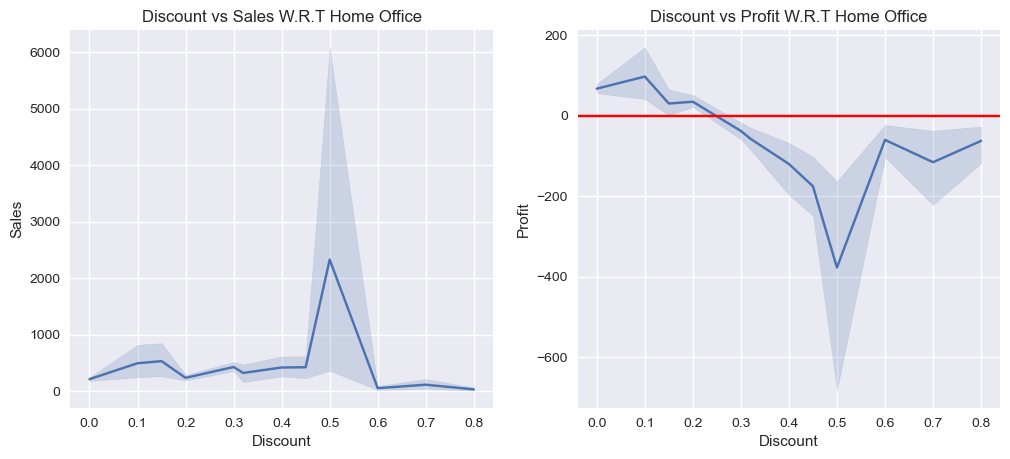

In [45]:
# Visualizing the effects of discount on slaes and proft
plt.figure(figsize=(12,5), dpi=100)

plt.subplot(1,2,1)
sb.lineplot(data=hom_prod, x='Discount', y='Sales')
plt.title('Discount vs Sales W.R.T Home Office')

plt.subplot(1,2,2)
sb.lineplot(data=hom_prod, x='Discount', y='Profit')
plt.title('Discount vs Profit W.R.T Home Office')
plt.axhline(y=0,color='red')

plt.show()

**COMMENT:** *Again 0-25% are bringing profits, with 10% being the higest profit magnet.*
    
-------------

## Summary

|                       | Sub-Category | Category            | State        | Region        |
|-----------------------|--------------|---------------------|--------------|---------------|
| <b>Highest Profit</b> | Tables       | Technology(~50%)    | California   | West(~38%)    |
| <b>Lowest Profit</b>         | Copiers      | Furniture(~6-7%)    | Texas        | Central(~14%) |
| <b>Higest Sales</b>          | Phones       | Technology(~36%)    | California   | West(~32%)    |
| <b>Lowest Sales</b>          | Fasteners    | Office Supply(~32%) | North Dakota | South(~17%)   |

### Descriptive Summary

1. No given fields seem to have any strong **Correlation** with Profits we are making. It may be assumed that there is another factor at work which is highly correlated to this.

2. **Standard Class** is a most popular package among our customers and generates the most profit. We should re-design this package, in order have the best possible grasp of this opportunity.

3. Huge mass of our customer base belongs to **Consumer Segment** (with 5182 orders). New offers should be devised to engage them better(better recommender systems might be needed). These offers should be applicable on Shipping modes and pricing schemes both.

4. (continuation of point 3) Runner up to the above is our **Corporate Segment** (with 3014 orders). As they usually buy in bulk we could come up with more offers suitable for their business needs. These offers should be applicable on Shipping modes and pricing schemes both.

5. (continuation of point 4) As for **Home Office Segment**(with least sales), we could target industries which are popular among them(as an starting act). Then we will focus on accumulating products on our shelves which relate to their needs.

6. **West** and **East** have a high customer base. As for **Central**, we might improve our marketting strategies over there. We might be getting a tough competition in the **South**. In any case, we should focus on what is causing this minimized customer reach over there.

7. Although **Office Supplies**(category) have the most order count, but it has the least sales. This could be a problem of our pricing models or product accumulation customs.

8. **Furniture**(category) needs more attention as it profits are at the minimum. We should look more into their marketting promotions and areas in which they have a market.

10. Connecting the above (point 8), overall **south region** region needs more attention with respect to customer needs and satisfaction.

11. Sales have higher **std.deviation** and profits have relatively less (roughly 1/3 of sales). We are getting about 60-70% profit from our total sales. This might mean that we are unable to obtain profits from about 30-40% of our Sales. This is a bad case for our Superstore.

12. Feasible values for **Discounts** are found to be 0-20%. Any more than that results in loss according to our current pricing schemes. Optimum Discount values range from 10-15%.

13. Sales have the highest **correlation** with Profit among other fields, which is ~48. This is not a strong relation, which suggests that increase in sales does not(for the most part) increase our profits. Pricing scheme or packages such as shipping modes etc may be the issue.